# Data Science and Business Analytics Internship
## AUTHOR : Umang Joshi
## TASK 3 : Exploratory Data Analysis - Retail 
## GRIP@SPARK FOUNDATION

### 1. Importing important Libraries

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2.Loading Dataset

In [345]:
store_data=pd.read_csv('SampleSuperstore.csv')
store_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 3. Data Pre-Processing

In [346]:
store_data.shape

(9994, 13)

In [347]:
store_data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [348]:
store_data.count()

Ship Mode       9994
Segment         9994
Country         9994
City            9994
State           9994
Postal Code     9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

In [349]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [350]:
store_data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [351]:
duplicates=store_data[store_data.duplicated()]
duplicates.shape

(17, 13)

In [352]:
store_data=store_data.drop_duplicates()
store_data.shape

(9977, 13)

In [353]:
data=store_data.drop(['Country','Postal Code'],axis='columns')
data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 4. Segment Wise Analysis

In [354]:
segment_u=data['Segment'].unique()
segment_u=np.sort(segment_u)
segment_sales=data.groupby('Segment').sum()['Sales']
segment_profit=data.groupby('Segment').sum()['Profit']

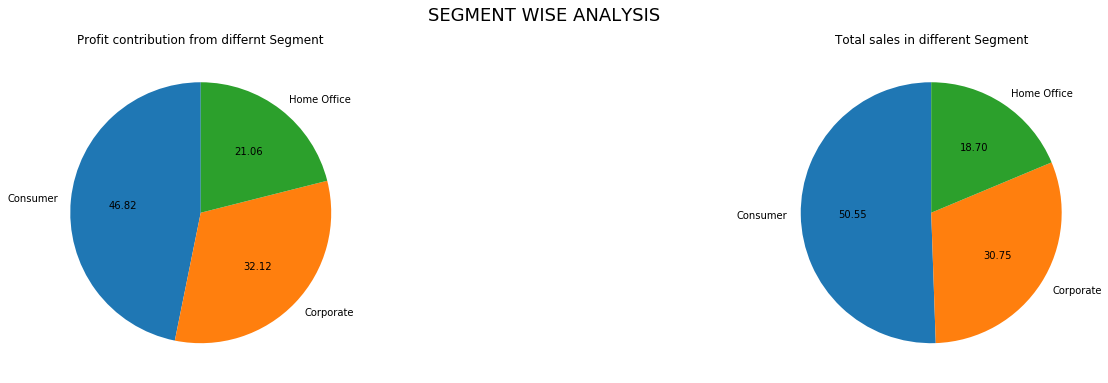

In [355]:
plt.figure(figsize=(24,6))
plt.suptitle('SEGMENT WISE ANALYSIS',fontsize=18)
plt.subplot(1,2,1)
plt.title('Profit contribution from differnt Segment')
plt.pie(segment_profit,labels=segment_u,autopct='%0.2f',startangle=90)
plt.subplot(1,2,2)
plt.title('Total sales in different Segment')
plt.pie(segment_sales,labels=segment_u,autopct='%0.2f',startangle=90)
plt.show()

#### CONCLUSION
##### 1. Profit contribution and Total Sales are Highest in Consumer Sector followed by Corporate and Home Office respectively

### 5. Region Wise Analysis

In [356]:
Region_u=data['Region'].unique()
Region_u=np.sort(Region_u)
Region_sales=data.groupby('Region').sum()['Sales']
Region_profit=data.groupby('Region').sum()['Profit']

([<matplotlib.patches.Wedge at 0x232c4508>,
 [Text(1.0384559071462685, 0.36278000070706895, 'Central'),
  Text(-0.4066531649753145, 1.0220729931935193, 'East'),
  Text(-1.0595491963246726, -0.2955596396122798, 'South'),
  Text(0.25019213284949454, -1.0711694061446215, 'West')],
 [Text(0.5664304948070554, 0.19788000038567394, '21.81'),
  Text(-0.22181081725926244, 0.5574943599237377, '29.55'),
  Text(-0.5779359252680031, -0.16121434887942535, '17.06'),
  Text(0.13646843609972428, -0.5842742215334298, '31.59')])

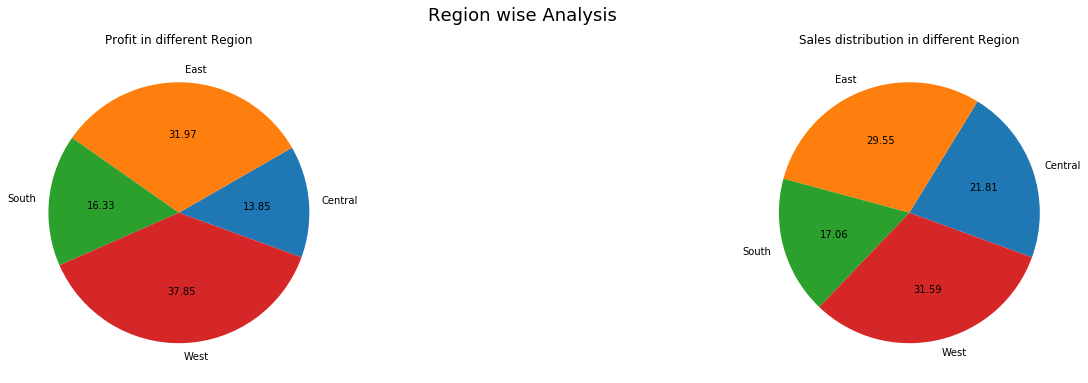

In [357]:
plt.figure(figsize=(24,6))
plt.suptitle('Region wise Analysis',fontsize=18)
plt.subplot(1,2,1)
plt.title('Profit in different Region')
plt.pie(Region_profit,labels=Region_u,autopct='%0.2f',startangle=-20)
plt.subplot(1,2,2)
plt.title('Sales distribution in different Region')
plt.pie(Region_sales,labels=Region_u,autopct='%0.2f',startangle=-20)


#### CONCLUSION
##### 1. West Region contributes highest profit as sales are highest here
##### 2. Despite having lesser sales in south region then Central , it has more profit then central.
##### 3. Increasing sales in South can contribute more profit 

### 6. Category Wise Analysis

In [358]:
category_u=data['Category'].unique()
category_u=np.sort(category_u)
category_sales=data.groupby(['Category']).sum()['Sales']
category_profit=data.groupby(['Category']).sum()['Profit']

([<matplotlib.patches.Wedge at 0x1b5dc588>,
 [Text(-0.933984488224293, 0.5810963566882911, 'Furniture'),
  Text(-0.14234450217305203, -1.0907511369240492, 'Office Supplies'),
  Text(1.0013276547410392, 0.4553492372353445, 'Technology')],
 [Text(-0.509446084485978, 0.3169616491027042, '32.28'),
  Text(-0.07764245573075564, -0.5949551655949359, '31.30'),
  Text(0.5461787207678396, 0.24837231121927877, '36.41')])

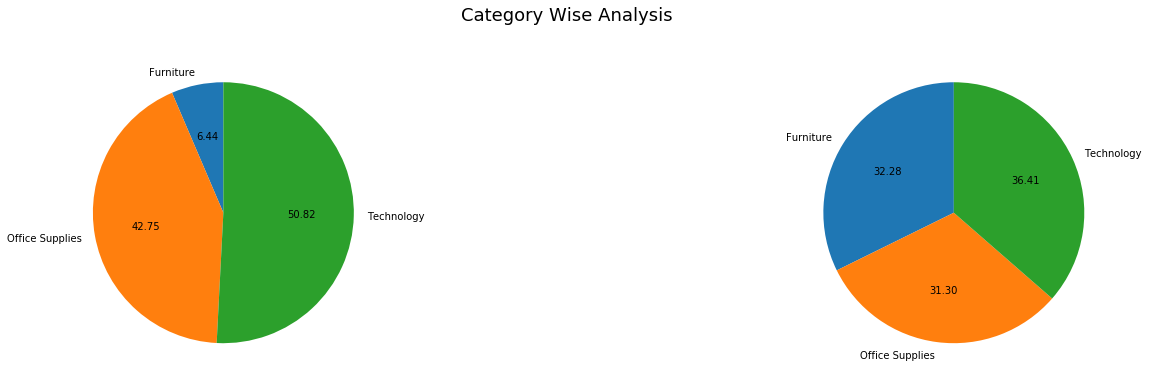

In [359]:
plt.figure(figsize=(24,6))
plt.suptitle('Category Wise Analysis',fontsize=18)
plt.subplot(1,2,1)
plt.pie(category_profit,labels=category_u,autopct='%0.2f',startangle=90)
plt.subplot(1,2,2)
plt.pie(category_sales,labels=category_u,autopct='%0.2f',startangle=90)

#### CONCLUSION
##### 1. Net profit % in technology product is highest
##### 2. Profit margin in furniture product is much lesser , despite having good sales it has lowest profit

### 7. Sub-Category Wise Analysis

In [360]:
sc_u=np.sort(data['Sub-Category'].unique())
sc_profit=data.groupby('Sub-Category')['Profit'].sum()
sc_sales=data.groupby('Sub-Category')['Sales'].sum()


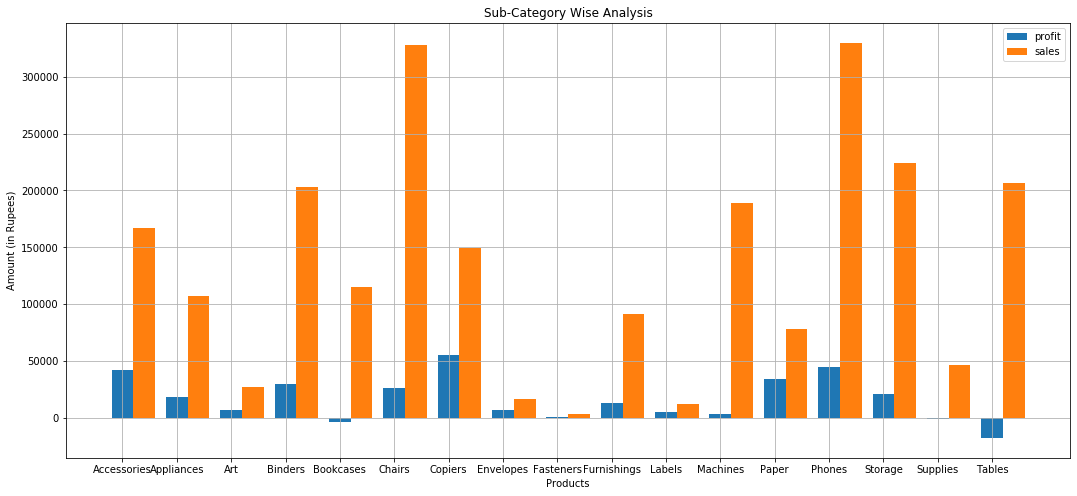

In [361]:
plt.figure(figsize=(18,8))
sc_n=np.arange(len(sc_u))
plt.title('Sub-Category Wise Analysis')
plt.xticks(sc_n,sc_u)
plt.xlabel('Products')
plt.ylabel('Amount (in Rupees)')
plt.bar(sc_n,sc_profit,width=0.4,label='profit')
plt.bar(sc_n+0.4,sc_sales,width=0.4,label='sales')
plt.grid()
plt.legend()

#### CONCLUSION
##### 1. Phone has the highest sales followed by Chairs
##### 2. Tables and Bookcases are responsible for the losses
##### 3. Copiers and phones are the product which generates higher profit

### 8. Profit and Sales Analysis of different Sub-Category for specific segment

In [362]:
data_consumer=data[data['Segment']=='Consumer'].groupby(['Segment','Sub-Category']).sum()
data_corporate=data[data['Segment']=='Corporate'].groupby(['Segment','Sub-Category']).sum()
data_home=data[data['Segment']=='Home Office'].groupby(['Segment','Sub-Category']).sum()

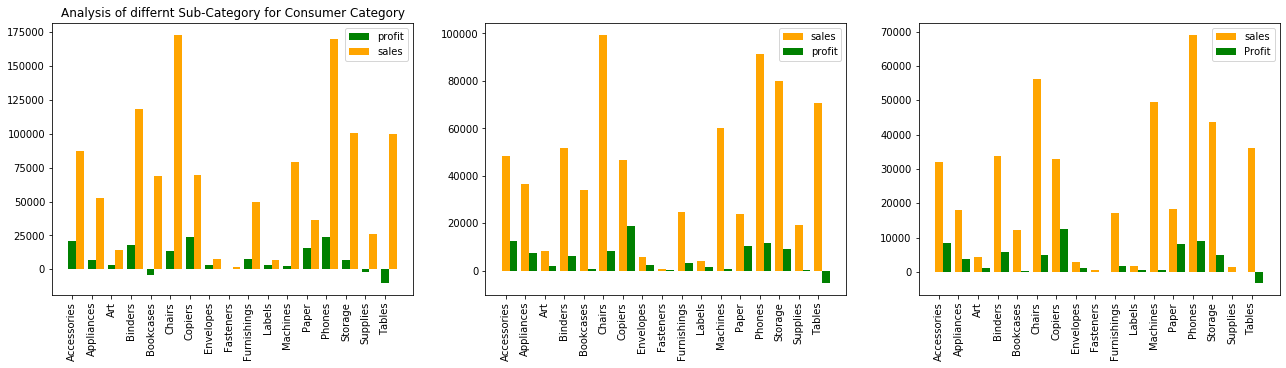

In [363]:

plt.figure(figsize=(22,5))
csc_u=np.sort(data['Sub-Category'].unique())
csc_n=np.arange(len(csc_u))
plt.subplot(1,3,1)
plt.title('Analysis of differnt Sub-Category for Consumer Category')
plt.xticks(csc_n,csc_u,rotation=90)
plt.bar(csc_n,data_consumer['Profit'],width=0.4,label='profit',color='green')
plt.bar(csc_n+0.4,data_consumer['Sales'],width=0.4,label='sales',color='orange')
plt.legend()

plt.subplot(1,3,2)
j=data['Sub-Category'].unique()
i=sorted(j)
h=np.arange(len(data['Sub-Category'].unique()))
plt.xticks(h,i,rotation=90)
plt.bar(h,data_corporate['Sales'],width=0.4,label='sales',color='orange')
plt.bar(h+0.4,data_corporate['Profit'],width=0.4,label='profit',color='green')
plt.legend()

plt.subplot(1,3,3)
k=data['Sub-Category'].unique()
n=sorted(k)
l=np.arange(len(data['Sub-Category'].unique()))
plt.xticks(l,n,rotation=90)
plt.bar(l,data_home['Sales'],width=0.4,label='sales',color='orange')
plt.bar(l+0.4,data_home['Profit'],width=0.4,label='Profit',color='green')
plt.legend()

#### CONCLUSION
##### 1. Bookcases , Supplies , Tables are facing losses
##### 2. Phones , Copiers, Accessories are profitable product in Consumer Category
##### 3. Chairs , Phones are the most demanded products in consumer category
##### 4. In corporate sector Chairs, Phones,Storage,Tables etc are most selling product
##### 5. Table is only product which is facing loss.
##### 6. In Home Office also Chairs and Phones are the most selling products
##### 7. Table is only product in this category facing loss

### 9. Category wise Sales Analysis in different Region

In [364]:
data_reg=np.sort(data['Region'].unique())
data_regn=np.arange(len(data_reg))


In [365]:
e=data[data['Category']=='Furniture'].groupby('Region')['Sales'].sum()
f=data[data['Category']=='Office Supplies'].groupby('Region')['Sales'].sum()
g=data[data['Category']=='Technology'].groupby('Region')['Sales'].sum()


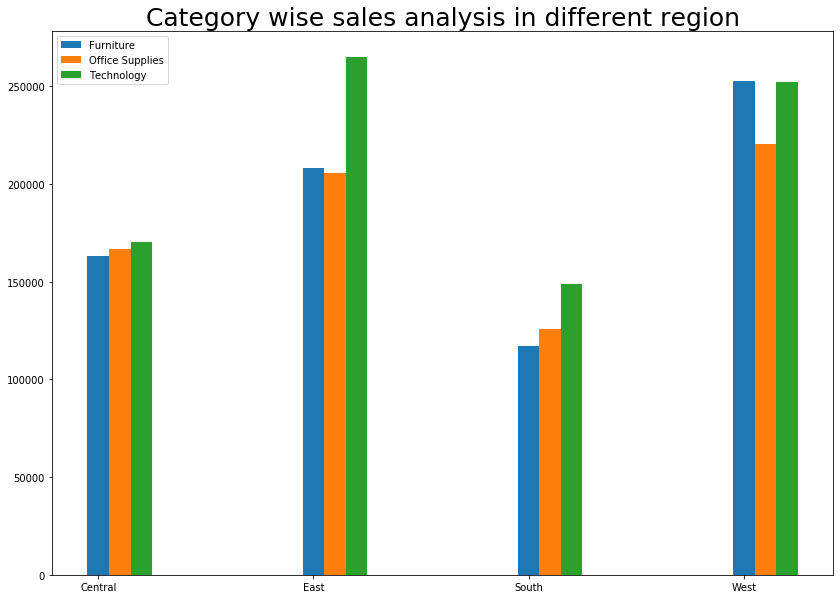

In [366]:
plt.figure(figsize=(14,10))
plt.xticks(data_regn,data_reg)
plt.title('Category wise sales analysis in different region',fontsize=25)
plt.bar(data_regn,e,width=0.1,label='Furniture')
plt.bar(data_regn+0.1,f,width=0.1,label='Office Supplies')
plt.bar(data_regn+0.2,g,width=0.1,label='Technology')
plt.legend()


#### CONCLUSION
##### 1.Demand of all the Category in Central and Southern Region is nearly Equal
##### 2. Eastern and Wester region have highest sales of technology products.
##### 4. Western Region has high sale of furniture product.

### 10. State Wise Sales and Profit Analysis

In [367]:
data_s=np.sort(data['State'].unique())
data_sn=np.arange(len(data_s))

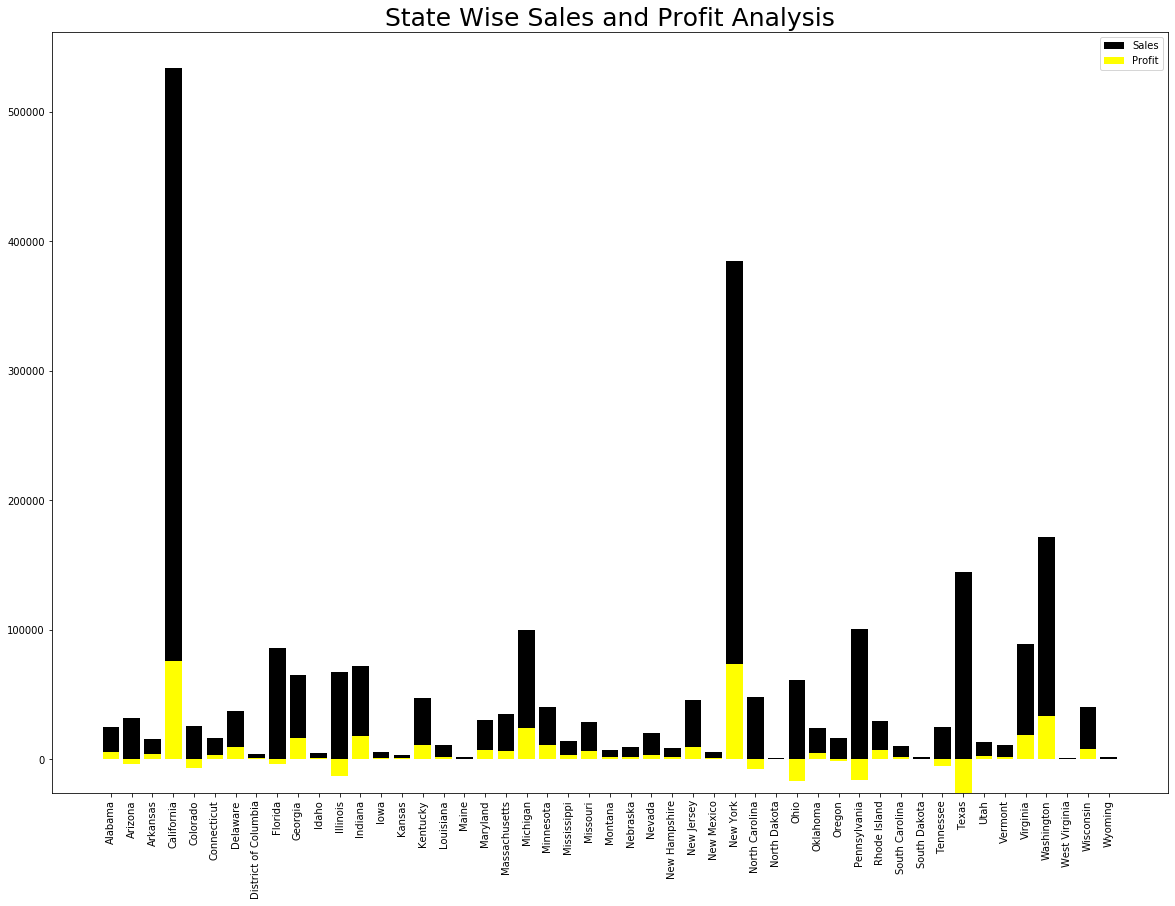

In [368]:
plt.figure(figsize=(20,14))
x=data.groupby('State')['Sales'].sum()
y=data.groupby('State')['Profit'].sum()
plt.xticks(data_sn,data_s,rotation=90)
plt.title('State Wise Sales and Profit Analysis',fontsize=25)
plt.bar(data_sn,x,color='black',label='Sales',bottom=y)
plt.bar(data_sn,y,color='yellow',label='Profit')
plt.legend()

#### CONCLUSION
##### 1. California state has highest no. of sales
##### 2. Stores in Texas , Tennessee , Pennsylvania , Oregon ,Ohio ,North Carolina , Illinios , Florida , Colorado , Arizona are running on losses.

### 12. City Wise Profit Loss Analysis

In [369]:
city_=data.groupby('City')[['Sales','Profit']].sum()
city_dsc=city_.sort_values(by='Profit',ascending=False)
city_asc=city_.sort_values(by='Profit',ascending=True)

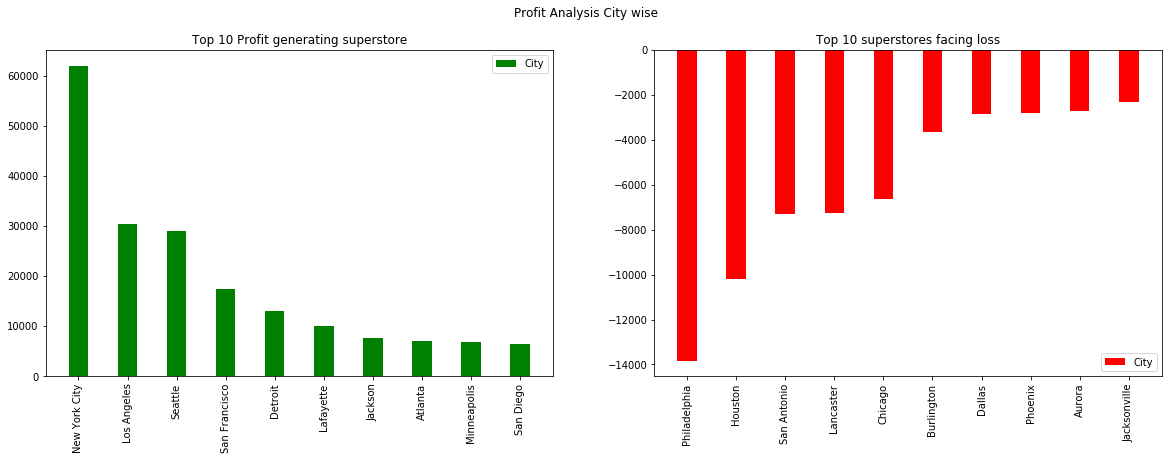

In [370]:
plt.figure(figsize=(20,6))
plt.suptitle('Profit Analysis City wise')
plt.subplot(1,2,1)
plt.title('Top 10 Profit generating superstore')
plt.xticks(rotation=90)
plt.bar(city_dsc.index[:10],city_dsc['Profit'][:10],label='City',color='green',width=0.4)
plt.legend()
plt.subplot(1,2,2)
plt.title('Top 10 superstores facing loss')
plt.xticks(rotation=90)
plt.bar(city_asc.index[:10],city_asc['Profit'][:10],label='City',color='red',width=0.4)
plt.legend()

#### CONCLUSION
##### 1 SuperStore in New York City generates highest profit
##### 2 Superstore in Philadelphia is facing huge loss 